This is an initial testing ground for any idea to expand or test during this process of learning:

# Performing EDA for the S&P500 index

In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

### 1. Get Data of the Index

This section uses the `yfinance` library to retrieve historical data for the S&P 500 index. The data is loaded into a Pandas DataFrame, capturing every trading day since the index's inception.


In [2]:
sp500 = yf.Ticker('^GSPC') #load the data
sp500 = sp500.history(period="max") #collect the historical data from creation of s&p500
sp500 #give us a panda dataframe of every trading day in sp500 history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000,0.0,0.0
2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000,0.0,0.0
2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000,0.0,0.0


In [3]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-19 00:00:00-04:00', '2024-08-20 00:00:00-04:00',
               '2024-08-21 00:00:00-04:00', '2024-08-22 00:00:00-04:00',
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24283, freq=None)

<Axes: xlabel='Date'>

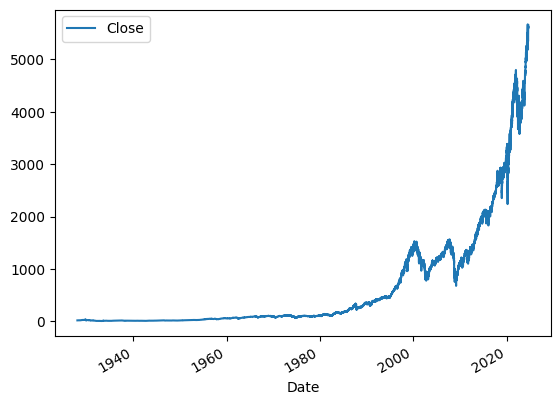

In [4]:
sp500.plot.line(y="Close", use_index=True)

In [5]:
# Safely remove the 'Dividends' column if it exists
if 'Dividends' in sp500.columns:
    del sp500['Dividends']

# Safely remove the 'Stock Splits' column if it exists
if 'Stock Splits' in sp500.columns:
    del sp500['Stock Splits']

sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000
2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000
2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000


### 2. EDA
Performing some basic data exploration for this dataset

#### Basic infos
Understand the structure of your dataset, including the data types and summary statistics.

In [6]:
# Display the first few rows of the dataset
print(sp500.head())

                                Open       High        Low      Close  Volume
Date                                                                         
1927-12-30 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000       0
1928-01-03 00:00:00-05:00  17.760000  17.760000  17.760000  17.760000       0
1928-01-04 00:00:00-05:00  17.719999  17.719999  17.719999  17.719999       0
1928-01-05 00:00:00-05:00  17.549999  17.549999  17.549999  17.549999       0
1928-01-06 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000       0


In [7]:
# Get a summary of the DataFrame, including non-null counts and data types
print(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24283 entries, 1927-12-30 00:00:00-05:00 to 2024-08-30 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24283 non-null  float64
 1   High    24283 non-null  float64
 2   Low     24283 non-null  float64
 3   Close   24283 non-null  float64
 4   Volume  24283 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB
None


In [8]:
# Summary statistics for numerical columns
print(sp500.describe())

               Open          High           Low         Close        Volume
count  24283.000000  24283.000000  24283.000000  24283.000000  2.428300e+04
mean     620.541381    644.079926    636.370648    640.470631  9.087460e+08
std     1054.323533   1049.074774   1037.278240   1043.551767  1.619754e+09
min        0.000000      4.400000      4.400000      4.400000  0.000000e+00
25%        9.700000     24.690001     24.690001     24.690001  1.525000e+06
50%       42.799999    103.150002    101.449997    102.290001  2.041000e+07
75%     1031.375000   1039.390015   1024.989990   1031.385010  9.871500e+08
max     5644.089844   5669.669922   5639.020020   5667.200195  1.145623e+10


#### missing values check:

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


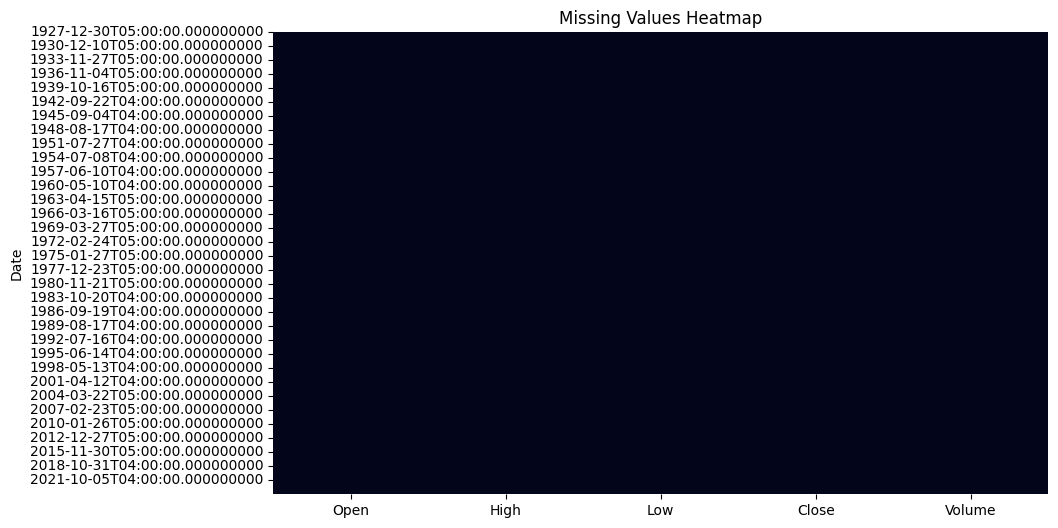

In [9]:
# Check for missing values
missing_values = sp500.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(sp500.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


#### Visualize Data

##### 1. Closing Prices Over Time
- **What it is**: A line plot showing how the S&P 500's closing prices have changed over time.
- **Why it’s important**: Helps you understand the overall trend in the stock market. Are prices generally going up, down, or staying flat? Recognizing these trends is essential for making predictions about future prices.

##### 2. Distribution of Closing Prices
- **What it is**: A histogram that shows how often different closing prices occurred.
- **Why it’s important**: Helps you see the range and frequency of different price levels. This can reveal if prices are usually clustered around certain values, which can be crucial when deciding which price ranges to focus on in your analysis.

##### 3. Volume Traded Over Time
- **What it is**: A line plot showing the number of shares traded over time.
- **Why it’s important**: Volume can indicate the strength or weakness of a price move. High trading volumes often happen before significant price changes, making this a key feature to watch.

##### 4. Rolling Mean and Standard Deviation
- **What it is**: Two line plots that show the average closing price over the past 100 days (rolling mean) and how much the price has been fluctuating (rolling standard deviation).
- **Why it’s important**: The rolling mean smooths out daily price changes to show longer-term trends. The rolling standard deviation tells you how volatile the market is—how much prices are swinging up and down, which can indicate periods of risk or stability.

##### 5. Daily Returns Distribution
- **What it is**: A histogram showing the percentage change in closing prices from one day to the next.
- **Why it’s important**: This tells you how much prices typically change each day. Understanding daily returns helps assess the risk and predict future price movements based on historical volatility.

##### 6. Cumulative Returns
- **What it is**: A line plot showing how much a $1 investment in the S&P 500 would have grown over time.
- **Why it’s important**: This visualization demonstrates the power of compounding returns. It shows how the value of the market has grown, giving you a sense of long-term market performance.

##### 7. Bollinger Bands
- **What it is**: A plot that shows the closing prices along with two bands that represent standard deviations above and below a 20-day moving average.
- **Why it’s important**: Bollinger Bands help you identify overbought or oversold conditions in the market. If prices are near the upper band, the market might be overbought; near the lower band, it might be oversold. This can guide buy/sell decisions.

##### 8. Autocorrelation Plot
- **What it is**: A plot that shows how today’s closing price is related to previous days’ prices.
- **Why it’s important**: Helps you identify patterns or repeated trends in the data. For example, if prices tend to rise after a certain number of days, this pattern can be used to make predictions.


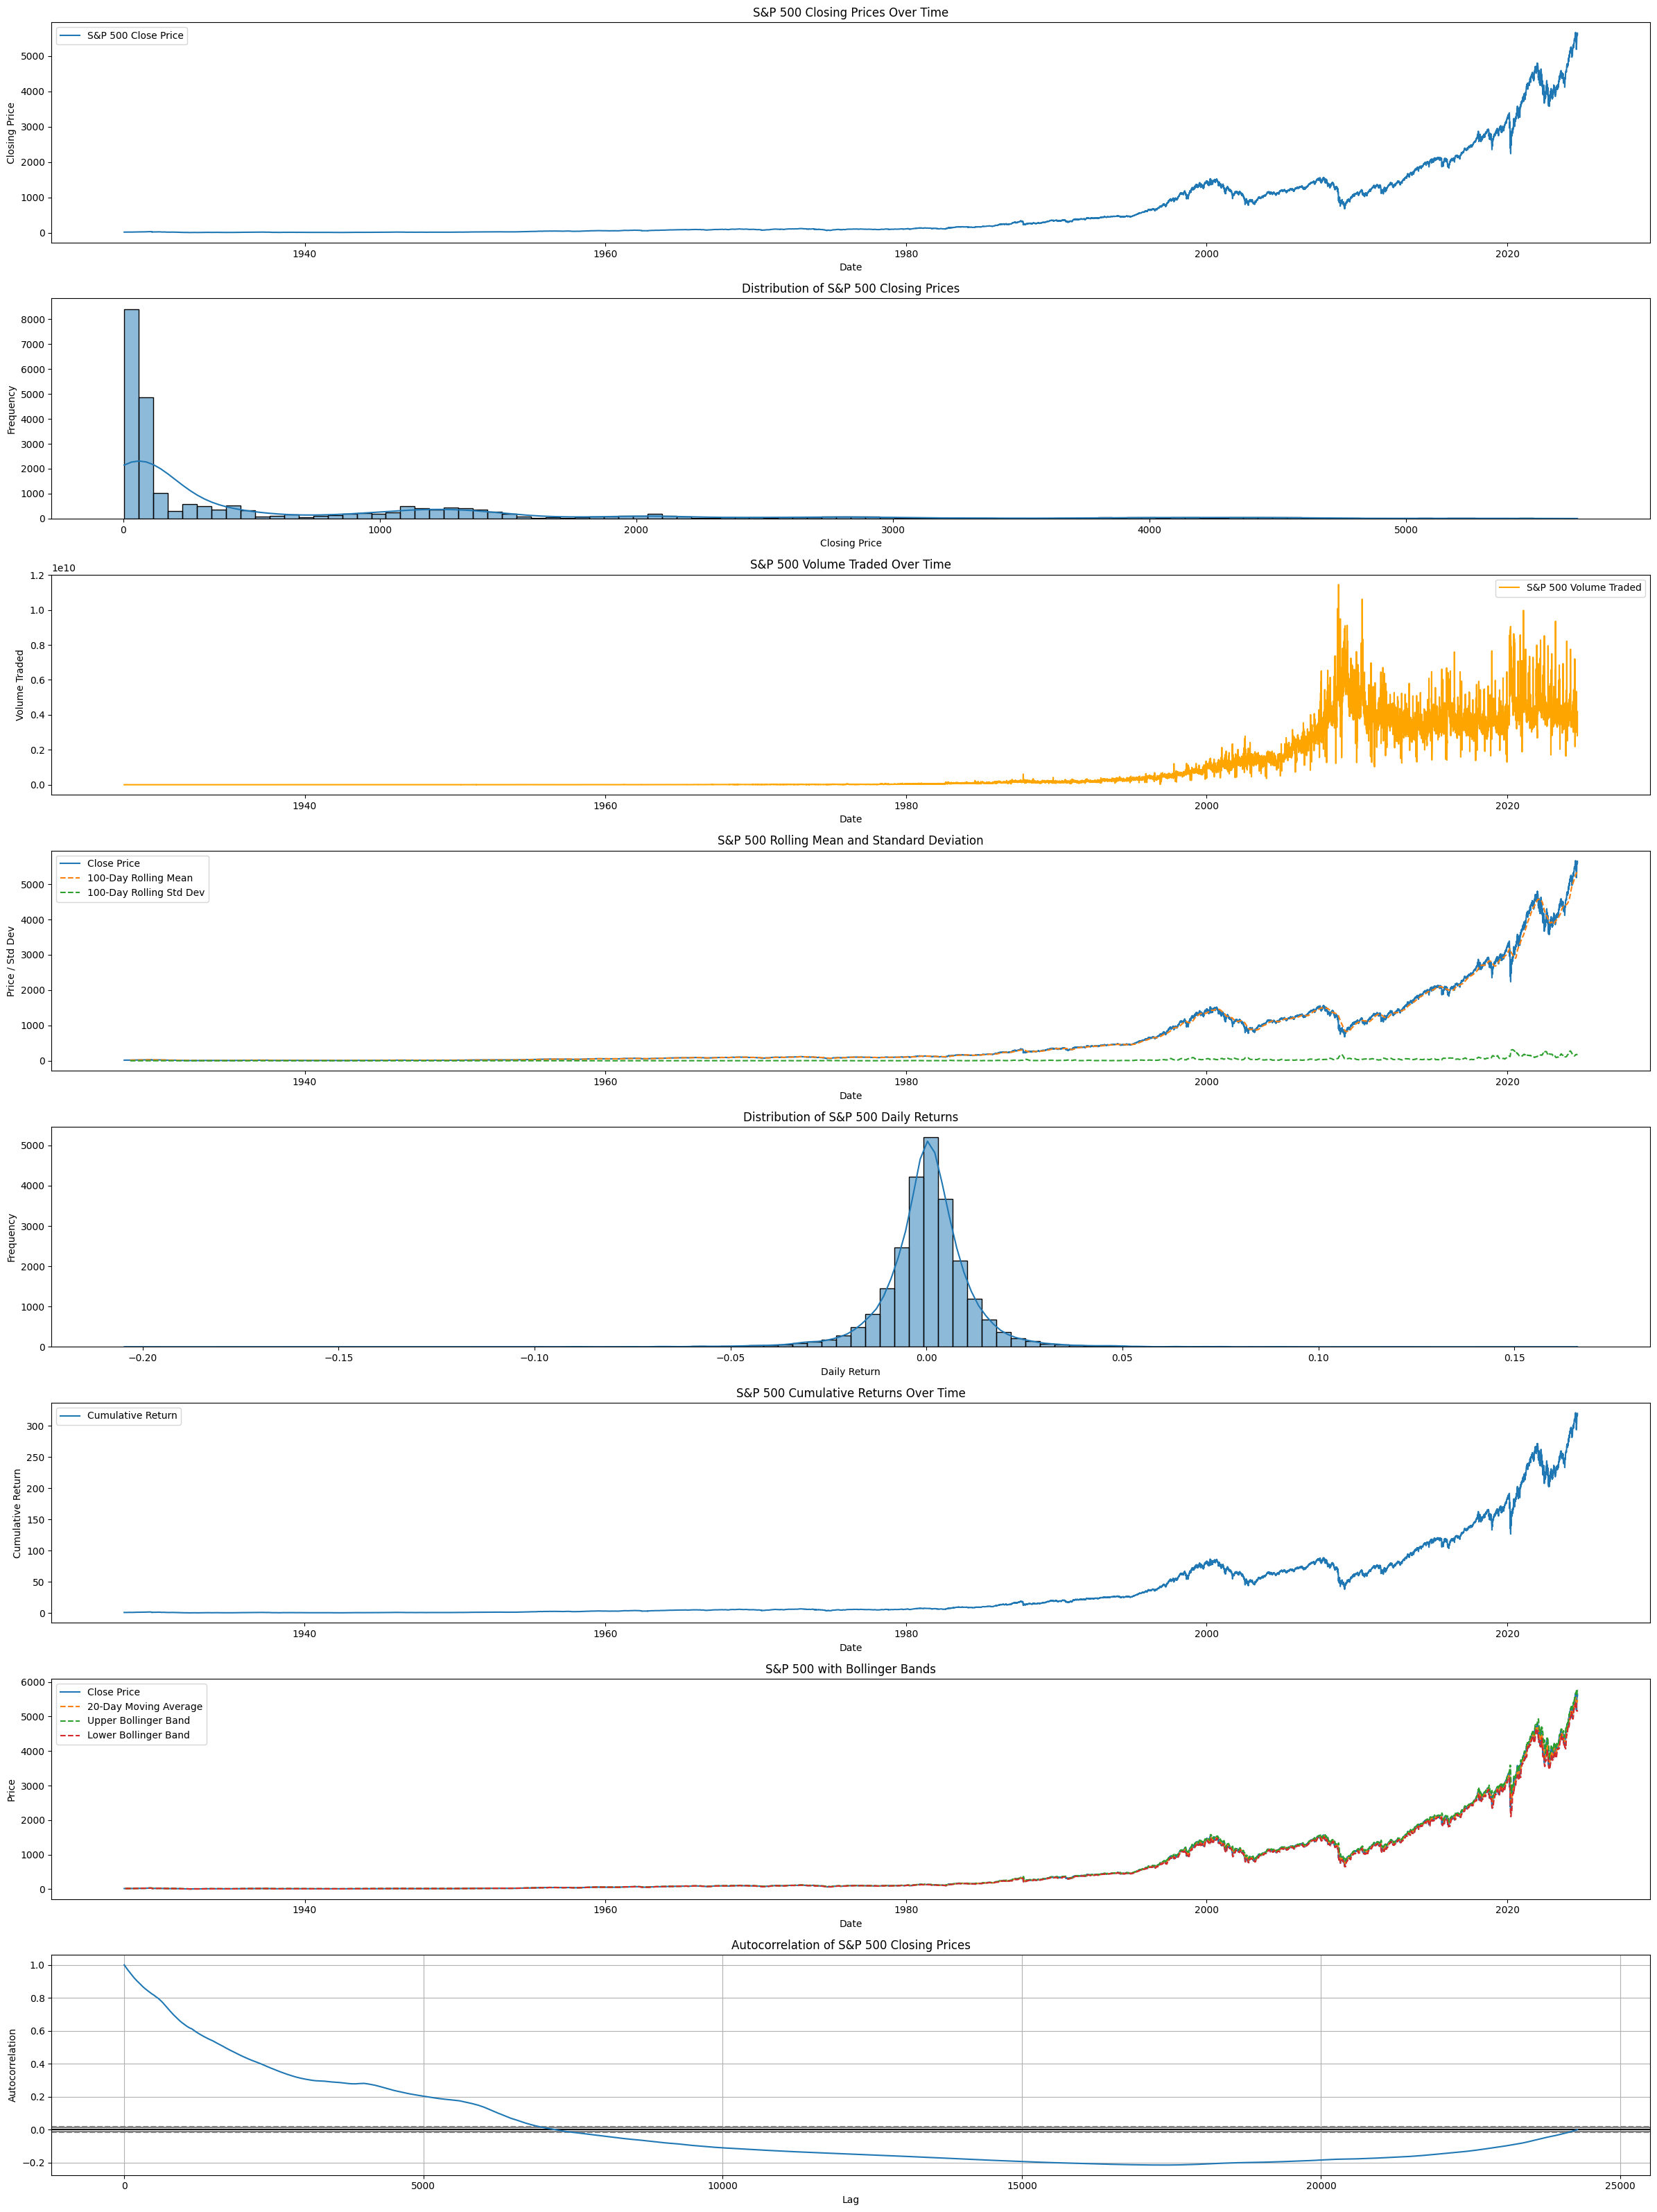

In [17]:
# Calculate additional features:
# - Rolling Mean and Standard Deviation for a 100-day window (common in financial analysis to understand trends and volatility).
# - Daily Return to capture the percentage change in price from one day to the next.
# - Cumulative Return to show how an investment would grow over time.
# - Moving Average and Bollinger Bands for a 20-day window to visualize volatility bands.

sp500['Rolling_Mean'] = sp500['Close'].rolling(window=100).mean()
sp500['Rolling_Std'] = sp500['Close'].rolling(window=100).std()
sp500['Daily_Return'] = sp500['Close'].pct_change()
sp500['Cumulative_Return'] = (1 + sp500['Daily_Return']).cumprod()
sp500['MA20'] = sp500['Close'].rolling(window=20).mean()
sp500['Upper_BB'] = sp500['MA20'] + (sp500['Close'].rolling(window=20).std() * 2)
sp500['Lower_BB'] = sp500['MA20'] - (sp500['Close'].rolling(window=20).std() * 2)

# Set up the grid layout with 8 rows and 1 column
fig, axs = plt.subplots(8, 1, figsize=(24, 32))  # 8x1 grid, with large figures for clarity

# 1. Plot Closing Prices Over Time
# - This plot shows how the S&P 500 closing prices have changed over the entire period.
# - Useful to visualize overall trends, growth, and significant drops or spikes.
axs[0].plot(sp500['Close'], label='S&P 500 Close Price')
axs[0].set_title('S&P 500 Closing Prices Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Closing Price')
axs[0].legend()

# 2. Plot the Distribution of Closing Prices
# - This histogram shows how frequently certain closing prices have occurred.
# - The KDE (Kernel Density Estimate) provides a smooth curve to understand the distribution better.
# - Useful for understanding the range and central tendency of the closing prices.
sns.histplot(sp500['Close'], bins=100, kde=True, ax=axs[1])
axs[1].set_title('Distribution of S&P 500 Closing Prices')
axs[1].set_xlabel('Closing Price')
axs[1].set_ylabel('Frequency')

# 3. Plot Volume Traded Over Time
# - This plot shows how the volume of trades has changed over time.
# - High volumes often precede significant price changes, making this an important feature to monitor.
axs[2].plot(sp500['Volume'], label='S&P 500 Volume Traded', color='orange')
axs[2].set_title('S&P 500 Volume Traded Over Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Volume Traded')
axs[2].legend()

# 4. Plot Rolling Mean and Standard Deviation
# - Rolling Mean smooths out short-term fluctuations and highlights longer-term trends.
# - Rolling Standard Deviation shows the volatility of the market.
# - Useful to identify stable periods vs. volatile periods.
axs[3].plot(sp500['Close'], label='Close Price')
axs[3].plot(sp500['Rolling_Mean'], label='100-Day Rolling Mean', linestyle='--')
axs[3].plot(sp500['Rolling_Std'], label='100-Day Rolling Std Dev', linestyle='--')
axs[3].set_title('S&P 500 Rolling Mean and Standard Deviation')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price / Std Dev')
axs[3].legend()

# 5. Plot Daily Returns Distribution
# - This histogram shows the distribution of daily returns (percentage change from one day to the next).
# - Useful for understanding market volatility and the likelihood of large gains or losses.
sns.histplot(sp500['Daily_Return'].dropna(), bins=100, kde=True, ax=axs[4])
axs[4].set_title('Distribution of S&P 500 Daily Returns')
axs[4].set_xlabel('Daily Return')
axs[4].set_ylabel('Frequency')

# 6. Plot Cumulative Returns
# - This plot shows how a $1 investment in the S&P 500 would have grown over time.
# - Useful for understanding long-term growth and the power of compounding returns.
axs[5].plot(sp500['Cumulative_Return'], label='Cumulative Return')
axs[5].set_title('S&P 500 Cumulative Returns Over Time')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Cumulative Return')
axs[5].legend()

# 7. Plot Bollinger Bands
# - Bollinger Bands consist of a moving average (MA) and two standard deviation bands.
# - When prices approach the upper band, the market is considered overbought; near the lower band, it's oversold.
# - Useful for identifying periods of high or low volatility.
axs[6].plot(sp500['Close'], label='Close Price')
axs[6].plot(sp500['MA20'], label='20-Day Moving Average', linestyle='--')
axs[6].plot(sp500['Upper_BB'], label='Upper Bollinger Band', linestyle='--')
axs[6].plot(sp500['Lower_BB'], label='Lower Bollinger Band', linestyle='--')
axs[6].fill_between(sp500.index, sp500['Upper_BB'], sp500['Lower_BB'], color='gray', alpha=0.2)
axs[6].set_title('S&P 500 with Bollinger Bands')
axs[6].set_xlabel('Date')
axs[6].set_ylabel('Price')
axs[6].legend()

# 8. Autocorrelation Plot
# - This plot shows the correlation of the S&P 500 closing price with its own past values (lags).
# - Useful for identifying patterns, such as seasonality or momentum, which could inform your predictive model.
autocorrelation_plot(sp500['Close'], ax=axs[7])
axs[7].set_title('Autocorrelation of S&P 500 Closing Prices')

# Adjust layout to give space for x-axis labels
plt.tight_layout()

# Display the plots
plt.show()

#### Interpretations:

1. **S&P 500 Closing Prices Over Time**
   - The plot shows a clear long-term upward trend, accelerating from the 1980s onwards.
   - Sharp increases in recent years suggest strong market growth.
   - Dips represent market corrections or downturns, such as the 2000 dot-com bubble and 2008 financial crisis.

2. **Distribution of S&P 500 Closing Prices**
   - The distribution is left-skewed, with most prices clustered at lower values.
   - This reflects the market's historically lower levels, with higher prices occurring more recently.

3. **S&P 500 Volume Traded Over Time**
   - Trading volume was low and stable until the late 1980s, then increased significantly.
   - Spikes in volume often correspond to high market activity, such as during crashes or recoveries.
   - The overall increase suggests greater market participation over time.

4. **S&P 500 Rolling Mean and Standard Deviation**
   - The 100-day rolling mean tracks the upward market trend, smoothing out short-term fluctuations.
   - The 100-day rolling standard deviation highlights periods of high volatility, often during market corrections.
   - These metrics provide insights into market stability and volatility.

5. **Distribution of S&P 500 Daily Returns**
   - Daily returns are centered around 0%, with a slight positive skew, indicating the market generally gains more than it loses.
   - Fat tails suggest extreme returns are more common than a normal distribution would predict, emphasizing the market's risk profile.

6. **S&P 500 Cumulative Returns Over Time**
   - This plot illustrates the cumulative growth of the S&P 500, highlighting the power of compound growth.
   - The exponential curve, especially in recent decades, shows significant long-term returns.
   - Sharp rises and plateaus reflect periods of growth and market corrections.

7. **S&P 500 with Bollinger Bands**
   - Bollinger Bands visualize market volatility, with bands widening during high volatility and contracting during stability.
   - Prices near the upper band may indicate overbought conditions, while prices near the lower band suggest oversold conditions.
   - The price staying within the bands reflects typical market behavior, with deviations indicating potential trading signals.

8. **Autocorrelation of S&P 500 Closing Prices**
   - The plot shows how past closing prices influence future values, with autocorrelation decreasing over time.
   - The initial high autocorrelation suggests today’s price is influenced by previous values, but this effect weakens over time.
   - Periodic dips and peaks may indicate cycles or seasonality, which could be useful for predictive modeling.
